This notebook will analyze the intensities and errors of CO 2-1 emission at the locations of all of the SNe in our sample across all of the resolutions in the survey.

We will use this to uncover what resolution will be best for this study.

This notebook produces figure 2 and the MGSD percentiles table.


In [1]:
import numpy as np
import astropy
import astropy.io.fits as pyfits
from astropy.table import Table, join
from astropy.io import ascii

import sys
sys.path.append('/home/mayker.1/Desktop/PythonFunctions')
#sys.path.append('/Users/nessmayker/Desktop/PythonFunctions')
from detectionFraction import detecFrac
from cumulativeDistFunc import makeCDF
from findPercentiles import findStats

In [2]:
#import SNe data 

SNe_Gal_File = '../Data/3.SNe+GalData.csv'
SNe_Gal_Data = Table.read(SNe_Gal_File, format='csv') 

intenFile = '../Data/3.IntenData.csv'
intenData = Table.read(intenFile, format='csv')

database  = join(SNe_Gal_Data, intenData, keys=('SN_name', 'galaxy'))


In [3]:

#This database is only holding the SNe that have 150pc maps and is missing 1988A, 1989M, 2018ivc, 2017gax

# for i in range(len(database["SN_name"])):
#     print(i, database["SN_name"][i], database["SN_type"][i])

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def setupBar(low, high, resArray, resStr):
    '''
    set up figure 2 barplot.
    
    '''
    lowStr = "No or Weak Detection (S/N < " + str(low) + ")"
    midStr = "Moderate Detection (" + str(low) + " $\leq$ S/N < " + str(high) + ")"
    upStr  = "Strong Detection (" + str(high) + " $\leq$ S/N)" 

    x = [lowStr, midStr, upStr]
    x_pos = [i for i, _ in enumerate(x)]

    lowCtr, midCtr, upCtr = 0,0,0

    for i in range(len(resArray)):
        if resArray[i] < low:
            lowCtr += 1
        elif resArray[i] > low and resArray[i] < high:
            midCtr += 1
        elif resArray[i] > high:
            upCtr += 1
    
    bars = [lowCtr, midCtr, upCtr]

    return(x, x_pos, bars)    


['No or Weak Detection (S/N < 3.0)', 'Moderate Detection (3.0 $\\leq$ S/N < 7.0)', 'Strong Detection (7.0 $\\leq$ S/N)'] [0, 1, 2] [1, 3, 3]


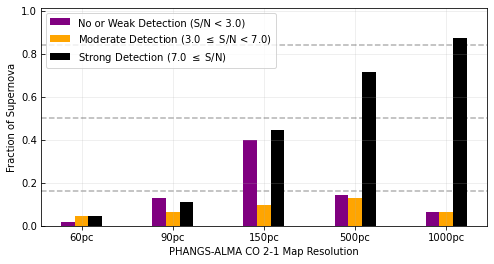

<Figure size 432x288 with 0 Axes>

[25, 6, 28]
63


In [5]:
low, high = 3.0, 7.0
x60, x_pos60, bar60     = setupBar(low, high, database['pc60SNR'], '60pc')
x90, x_pos90, bar90     = setupBar(low, high, database['pc90SNR'], '90pc')
x120, x_pos120, bar120   = setupBar(low, high, database['pc120SNR'], '120pc')
x150, x_pos150, bar150   = setupBar(low, high, database['pc150SNR'], '150pc')
x500, x_pos500, bar500   = setupBar(low, high, database['pc500SNR'], '500pc')
x750, x_pos750, bar750   = setupBar(low, high, database['pc750SNR'], '750pc')
x1000, x_pos1000, bar1000 = setupBar(low, high, database['pc1000SNR'], '1000pc')
print(x60, x_pos60,bar60)
sampleSize = len(database['SN_name'])
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.15  # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_figheight(4)
fig.set_figwidth(8)
ax.grid(True, alpha = 0.25)
ax.axhline(y=0.16, ls = '--', color = 'k', alpha = 0.3, zorder=0)
ax.axhline(y=0.50, ls = '--', color = 'k', alpha = 0.3)
ax.axhline(y=0.84, ls = '--', color = 'k', alpha = 0.3)
rects1 = ax.bar(ind[0], bar60[0]/sampleSize, width, color='purple')
rects2 = ax.bar(ind[1], bar90[0]/sampleSize, width, color='purple')
rects3 = ax.bar(ind[2], bar150[0]/sampleSize, width, color='purple')
rects4 = ax.bar(ind[3], bar500[0]/sampleSize, width, color='purple')
rects7 = ax.bar(ind[4], bar1000[0]/sampleSize, width, color='purple')
rects1 = ax.bar(ind[0]+width, bar60[1]/sampleSize, width, color='orange')
rects2 = ax.bar(ind[1]+width, bar90[1]/sampleSize, width, color='orange')
rects3 = ax.bar(ind[2]+width, bar150[1]/sampleSize, width, color='orange')
rects4 = ax.bar(ind[3]+width, bar500[1]/sampleSize, width, color='orange')
rects8 = ax.bar(ind[4]+width, bar1000[1]/sampleSize, width, color='orange')
rects1 = ax.bar(ind[0]+2*width, bar60[2]/sampleSize, width, color='black')
rects2 = ax.bar(ind[1]+2*width, bar90[2]/sampleSize, width, color='black')
rects3 = ax.bar(ind[2]+2*width, bar150[2]/sampleSize, width, color='black')
rects4 = ax.bar(ind[3]+2*width, bar500[2]/sampleSize, width, color='black')
rects9 = ax.bar(ind[4]+2*width, bar1000[2]/sampleSize, width, color='black')
ax.set_ylabel('Fraction of Supernova')
ax.set_ylim(0.0,1.01)
ax.set_xticks(ind + width)
ax.tick_params(axis='y', direction='in')
ax.set_xticklabels(['60pc', '90pc', '150pc', '500pc', '1000pc'])
ax.set_xlabel("PHANGS-ALMA CO 2-1 Map Resolution")
ax.legend((rects7[0], rects8[0],rects9[0]), (x60))
plt.show()
plt.tight_layout()
fig.savefig('../Figures/SNR_Dist_BySNR.png', dpi=300)
plt.show()
plt.close()

print(bar150)
print(sampleSize)

[1, 3, 3]
[0.14285714285714285, 0.42857142857142855, 0.42857142857142855]
7
3


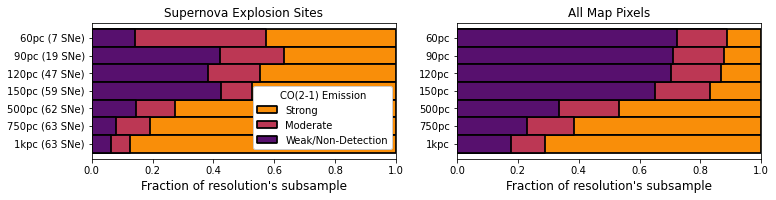

In [56]:
import seaborn as sns

# Assign counts per day per type for multi colored bar plot

counts, normVals = [],[]
resolutions = ['60pc (7 SNe)', '90pc (19 SNe)', "120pc (47 SNe)", "150pc (59 SNe)", "500pc (62 SNe)", "750pc (63 SNe)", "1kpc (63 SNe)"]
classifications = ["Weak/Non-Detection", "Moderate", "Strong"]
barcounts = [bar60, bar90, bar120, bar150, bar500, bar750, bar1000]

for i in range(len(resolutions)):
    numWeak   = barcounts[i][0] 
    numMod    = barcounts[i][1]  
    numStrong = barcounts[i][2] 
    sumNum    = numWeak + numMod + numStrong 
    counts.append([numWeak, numMod, numStrong])
    normVals.append([numWeak/sumNum, numMod/sumNum, numStrong/sumNum])
print(counts[0])
print(normVals[0])
print(len(resolutions))
print(len(classifications))
    
indRes, indClass, indNorm, indSum = [],[],[],[]
for i in range(len(resolutions)):
    sum = 0
    for j in range(len(classifications)):
        indRes.append(resolutions[i])
        indClass.append(classifications[j])
        indNorm.append(normVals[i][j])
        sum += normVals[i][j] 
        indSum.append(sum)

        
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,2.5))
sns.histplot(y=indRes, hue=indClass, weights = indSum, multiple="stack", discrete = True, fill=True, palette="inferno", alpha = 1.0,legend=None, ax=ax[0])
ax[0].set_xlabel("Fraction of resolution's subsample", fontsize = 12)
ax[0].set_xlim(0,1.0)
ax[0].set_title("Supernova Explosion Sites")
# ax[0].legend(labels=["Strong", "Moderate", "Weak/Non-Detection"],framealpha=1, borderaxespad = 1, borderpad = 0.4,title="CO(2-1) Emission")

allPixBarCounts = [[0.7225745935322494, 0.16582436155313618, 0.1116010449146144],[0.709862625761676, 0.16617325695966084, 0.12396411727866319],[0.7030797656198061, 0.16483370368654218, 0.13208653069365175],[0.650282301428791, 0.18230903753517524, 0.16740866103603386],[0.33570131204953363, 0.19528065871809588, 0.46901802923237046],[0.2300366615297458, 0.15399188823943524, 0.6159714502308189],[0.17725459314299602, 0.11364070378138234, 0.7091047030756217]]
# Assign counts per day per type for multi colored bar plot

counts, normVals = [],[]
resolutions = ['60pc', '90pc', "120pc", "150pc", "500pc", "750pc", "1kpc"]
classifications = ["Weak/Non-Detection", "Moderate", "Strong"]

for i in range(len(resolutions)):
    numWeak   = allPixBarCounts[i][0] 
    numMod    = allPixBarCounts[i][1]  
    numStrong = allPixBarCounts[i][2] 
    sumNum    = numWeak + numMod + numStrong 
    counts.append([numWeak, numMod, numStrong])
    normVals.append([numWeak/sumNum, numMod/sumNum, numStrong/sumNum])
    
indRes, indClass, indNorm, indSum = [],[],[],[]
for i in range(len(resolutions)):
    sum = 0
    for j in range(len(classifications)):
        indRes.append(resolutions[i])
        indClass.append(classifications[j])
        indNorm.append(normVals[i][j])
        sum += normVals[i][j] 
        indSum.append(sum)

        
sns.histplot(y=indRes, hue=indClass, weights = indSum, multiple="stack", discrete = True, fill=True, palette="inferno", alpha = 1.0,legend=None, ax=ax[1])
ax[1].set_title("All Map Pixels")
ax[1].set_xlabel("Fraction of resolution's subsample", fontsize = 12)
ax[1].set_xlim(0,1.0)
axbox = ax[0].get_position()

ax[0].legend(labels=["Strong", "Moderate", "Weak/Non-Detection"],framealpha=1, loc="lower right",borderaxespad = 1.0, borderpad = 0.4,title="CO(2-1) Emission",bbox_to_anchor=[axbox.x0+2.54*axbox.width, axbox.y0-0.13])

f.savefig("../Figures/HorizontalBarPlot.png", bbox_inches = "tight", dpi = 300)



[0.7030797656198061, 0.16483370368654218, 0.13208653069365175]
[0.7030797656198061, 0.16483370368654218, 0.13208653069365175]
7
3


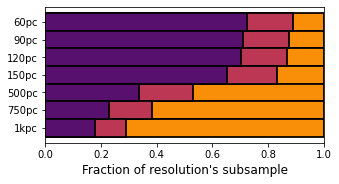

In [47]:
allPixBarCounts = [[0.7225745935322494, 0.16582436155313618, 0.1116010449146144],[0.709862625761676, 0.16617325695966084, 0.12396411727866319],[0.7030797656198061, 0.16483370368654218, 0.13208653069365175],[0.650282301428791, 0.18230903753517524, 0.16740866103603386],[0.33570131204953363, 0.19528065871809588, 0.46901802923237046],[0.2300366615297458, 0.15399188823943524, 0.6159714502308189],[0.17725459314299602, 0.11364070378138234, 0.7091047030756217]]
# Assign counts per day per type for multi colored bar plot

counts, normVals = [],[]
resolutions = ['60pc', '90pc', "120pc", "150pc", "500pc", "750pc", "1kpc"]
classifications = ["Weak/Non-Detection", "Moderate", "Strong"]

for i in range(len(resolutions)):
    numWeak   = allPixBarCounts[i][0] 
    numMod    = allPixBarCounts[i][1]  
    numStrong = allPixBarCounts[i][2] 
    sumNum    = numWeak + numMod + numStrong 
    counts.append([numWeak, numMod, numStrong])
    normVals.append([numWeak/sumNum, numMod/sumNum, numStrong/sumNum])
print(counts[2])
print(normVals[2])
print(len(resolutions))
print(len(classifications))
    
indRes, indClass, indNorm, indSum = [],[],[],[]
for i in range(len(resolutions)):
    sum = 0
    for j in range(len(classifications)):
        indRes.append(resolutions[i])
        indClass.append(classifications[j])
        indNorm.append(normVals[i][j])
        sum += normVals[i][j] 
        indSum.append(sum)

        
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,2.5))
sns.histplot(y=indRes, hue=indClass, weights = indSum, multiple="stack", discrete = True, fill=True, palette="inferno", alpha = 1.0,legend=None)
ax.set_xlabel("Fraction of resolution's subsample", fontsize = 12)
ax.set_xlim(0,1.0)
# ax.legend.remove()
f.savefig("../Figures/HorizontalBarPlotAllSNe.png", bbox_inches = "tight", dpi = 300)



In [7]:
def printStats(bar, res):
    numSNe = np.sum(bar)
    nodet = bar[0]
    modet = bar[1]
    hidet = bar[2]
    noPer = round(nodet/numSNe*100, 2)
    moPer = round(modet/numSNe*100, 2)
    hiPer = round(hidet/numSNe*100, 2)
    print(res,": ",numSNe," SNe:",noPer," % non",moPer," % moderate",hiPer," % strong")
        


printStats(bar1000, "1000")
printStats(bar750, "750")
printStats(bar500, "500")
printStats(bar150, "150")
printStats(bar120, "120")
printStats(bar90, "90")
printStats(bar60, "60")

1000 :  63  SNe: 6.35  % non 6.35  % moderate 87.3  % strong
750 :  63  SNe: 7.94  % non 11.11  % moderate 80.95  % strong
500 :  62  SNe: 14.52  % non 12.9  % moderate 72.58  % strong
150 :  59  SNe: 42.37  % non 10.17  % moderate 47.46  % strong
120 :  47  SNe: 38.3  % non 17.02  % moderate 44.68  % strong
90 :  19  SNe: 42.11  % non 21.05  % moderate 36.84  % strong
60 :  7  SNe: 14.29  % non 42.86  % moderate 42.86  % strong
